# Read data path and check files

In [3]:
train_data_path = "car_data/train/"
test_data_path = "car_data/test/"
valid_data_path = "car_data/valid/"

In [4]:
print(train_data_path)

car_data/train/


In [5]:
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from skimage import io
from collections import Counter
import random
import numpy as np
import matplotlib.pyplot as plt

size of image (h x w) 640 640


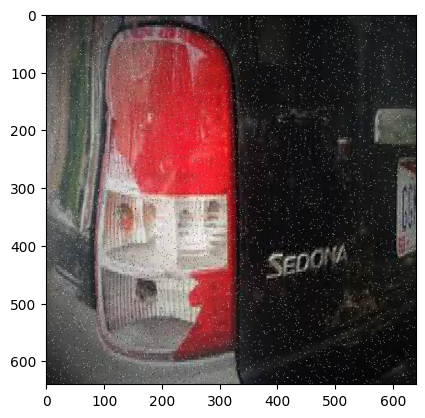

In [6]:
img = plt.imread(os.path.join(train_data_path, "sign_light--19-_jpg.rf.9170ffdd1abc3028910d4592a6aa9984.jpg"))
plt.imshow(img)
height, width, dim = img.shape
print("size of image (h x w)",height,width)

# Data Preprocessing

In [7]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

import os
# import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


# Removing duplicate images

In [8]:
def remove_duplicates(directory):
    seen_images = set()
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        # Check if the path points to a file
        if os.path.isfile(file_path):
            with open(file_path, 'rb') as f:
                image_hash = hash(f.read())
                if image_hash in seen_images:
                    os.remove(file_path)
                else:
                    seen_images.add(image_hash)

# Apply to train, test, and valid directories
remove_duplicates(train_data_path)
remove_duplicates(test_data_path)
remove_duplicates(valid_data_path)

# Handling Missing or corrupted images


In [9]:
def remove_invalid_images(directory):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            # Skip non-image files
            if not is_valid_image(file_path):
                continue

            img = io.imread(file_path)
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
            os.remove(file_path)

# Function to check if a file is a valid image
def is_valid_image(file_path):
    valid_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff']
    return any(file_path.lower().endswith(ext) for ext in valid_extensions)

# Apply to train, test, and valid directories
remove_invalid_images(train_data_path)
remove_invalid_images(test_data_path)
remove_invalid_images(valid_data_path)

# Loading Images

In [10]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)
valid = ImageDataGenerator(rescale=1/255)

img_width, img_height = 640, 640

nb_train_samples = 2000
nb_validation_samples = 800
nb_epoch = 5

train_dataset = train.flow_from_directory(directory = 'car_data/',classes = ['train']
                                         ,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

test_dataset = test.flow_from_directory(directory = 'car_data/',classes = ['test']
                                       ,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='binary')

valid_dataset = test.flow_from_directory(directory = 'car_data/',classes = ['valid']
                                        ,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='binary',
        shuffle=True)

Found 3356 images belonging to 1 classes.
Found 80 images belonging to 1 classes.
Found 390 images belonging to 1 classes.


Train model

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

In [52]:
# dimensions of our images.
img_width, img_height = 640, 640

nb_train_samples = 2000
nb_validation_samples = 800
nb_epoch = 5


model = Sequential()
model.add(Conv2D(32, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(img_width, img_height,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(32, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(32, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(32, (3, 3), strides=1, padding="same", activation="relu"))
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(32, (3, 3), strides=1, padding="same", activation="relu"))
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(32, (3, 3), strides=1, padding="same", activation="relu"))
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 640, 640, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 640, 640, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 320, 320, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 320, 320, 32)      9248      
                                                                 
 dropout_2 (Dropout)         (None, 320, 320, 32)      0         
                                                                 
 batch_normalization_7 (Bat  (None, 320, 320, 32)     

In [53]:
from keras.layers import Dense,Activation,Dropout, Conv2D, MaxPool2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1, min_delta=0.001)
modelcheck = ModelCheckpoint('best_model.hdf5', monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')

In [54]:
# Number of training and validation samples
nb_train_samples = 2000
nb_validation_samples = 800
batch_size = 32

# Calculate steps per epoch based on the total number of samples and batch size
steps_per_epoch = nb_train_samples // batch_size

# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=nb_epoch,
    validation_data=valid_dataset,
    # validation_steps=nb_validation_samples // batch_size,
)

Epoch 1/5
62/62 [==============================] - 513s 8s/step - loss: 0.0163 - accuracy: 0.9899 - val_loss: 1.2788e-08 - val_accuracy: 1.0000
Epoch 2/5
62/62 [==============================] - 505s 8s/step - loss: 4.2071e-27 - accuracy: 1.0000 - val_loss: 1.3720e-12 - val_accuracy: 1.0000
Epoch 3/5
62/62 [==============================] - 486s 8s/step - loss: 1.9669e-20 - accuracy: 1.0000 - val_loss: 6.9308e-15 - val_accuracy: 1.0000
Epoch 4/5
62/62 [==============================] - 507s 8s/step - loss: 8.4819e-25 - accuracy: 1.0000 - val_loss: 2.6246e-16 - val_accuracy: 1.0000
Epoch 5/5
62/62 [==============================] - 408s 7s/step - loss: 1.0005e-24 - accuracy: 1.0000 - val_loss: 3.2976e-17 - val_accuracy: 1.0000


In [55]:
model.save('car_model.hdf5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [56]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [57]:
import tensorflow as tf
# opening and store file in a variable

json_file = open('model.json','r')
loaded_model_json = json_file.read()
json_file.close()

# use Keras model_from_json to make a loaded model

loaded_model = tf.keras.models.model_from_json(loaded_model_json)

# load weights into new model

loaded_model.load_weights("model.h5")
print("Loaded Model from disk")

# compile and evaluate loaded model

loaded_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


Loaded Model from disk


In [58]:
def get_model():
    global model
    model = load_model('car_model')
    print("Model loaded!")

In [59]:
def load_image(img_path):

    img = image.load_img(img_path)
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    return img_tensor

def prediction(img_path):
    new_image = load_image(img_path)

    pred = model.predict(new_image)

    print(pred)

    labels=np.array(pred)
    labels[labels>=0.6]=1
    labels[labels<0.6]=0

    print(labels)
    final=np.array(labels)

    if final[0][0]==1:
        return "Bad"
    else:
        return "Good"

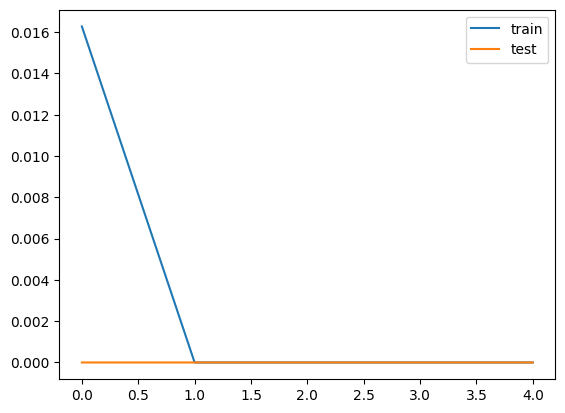

In [60]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [61]:
if 'val_accuracy' in history.history and len(history.history['val_accuracy']) >= 2:
    print('Test accuracy achieved', history.history['val_accuracy'][-2])
else:
    print('Validation accuracy data not available or not enough epochs.')

Test accuracy achieved 1.0


In [62]:
model.evaluate_generator(generator=valid_dataset,
steps=32)

/var/folders/2f/_yt57dw5583djbw4thgygftc0000gn/T/ipykernel_91977/872830986.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(generator=valid_dataset,


[3.297640546109615e-17, 1.0]

# Predict the Model

In [ ]:
test_dataset.reset()
pred=model.predict_generator(test_dataset,
steps=64,
verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)


In [ ]:
predicted_class_indices

In [ ]:
labels = (train_dataset.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [ ]:
import pandas as pd
filenames=test_dataset.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

# Validate Model Output


1/1 [==============================] - 0s 101ms/step
[[0.]]


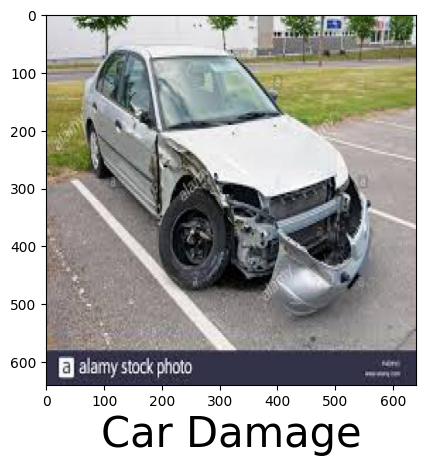

In [64]:
def predictImage(filename):

    img = image.load_img(filename)
    plt.imshow(img)

    Y = image.img_to_array(img)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val < 0.5:
        plt.xlabel("Car Damage",fontsize=30)
    elif val >= 0.5:
        plt.xlabel("Car Not Damage",fontsize=30)


u = 'car_data/valid/oct-6---80-_jpg.rf.589f871da0d1a7c12a8a24aeb0d56584.jpg'

predictImage(u)

In [ ]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

# Set dimensions of the images
img_width, img_height = 640, 640

# Number of training and validation samples
nb_train_samples = 2000
nb_validation_samples = 800
nb_epoch = 5


# Load the VGG16 model pre-trained on ImageNet data
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the layers of the pre-trained VGG16 model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of VGG16 for regression
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='linear')(x)  # Use linear activation for regression

# This is the model we will train for regression
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with an appropriate loss function for regression
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

# Set up EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=nb_train_samples // 32,  # Adjust based on your dataset size and batch size
    epochs=nb_epoch,
    validation_data=valid_dataset,
    validation_steps=nb_validation_samples // 16,  # Adjust based on your dataset size and batch size
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
result = model.evaluate(test_dataset)
print("Test Loss:", result[0])
print("Test MAE:", result[1])



In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

# Set up the model architecture (modify based on your specific model)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(GlobalAveragePooling2D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

# Set up EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=nb_train_samples // 32,  # Adjust based on your dataset size and batch size
    epochs=5,
    validation_data=valid_dataset,
    validation_steps=nb_validation_samples // 16,  # Adjust based on your dataset size and batch size
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
result = model.evaluate(test_dataset)
print("Test Loss:", result[0])
print("Test MAE:", result[1])

# Save the trained model
model.save('severity_model.h5')

Epoch 1/5
62/62 [==============================] - ETA: 0s - loss: 0.2349 - mae: 0.3031 WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 50 batches). You may need to use the repeat() function when building your dataset.


62/62 [==============================] - 890s 14s/step - loss: 0.2349 - mae: 0.3031 - val_loss: 0.0025 - val_mae: 0.0413
Epoch 2/5
62/62 [==============================] - ETA: 0s - loss: 0.0200 - mae: 0.0970 WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae


62/62 [==============================] - 847s 14s/step - loss: 0.0200 - mae: 0.0970
Epoch 3/5
62/62 [==============================] - ETA: 0s - loss: 0.0057 - mae: 0.0487 WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae


62/62 [==============================] - 849s 14s/step - loss: 0.0057 - mae: 0.0487
Epoch 4/5
62/62 [==============================] - ETA: 0s - loss: 0.0020 - mae: 0.0279 WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae


62/62 [==============================] - 854s 14s/step - loss: 0.0020 - mae: 0.0279
Epoch 5/5
62/62 [==============================] - ETA: 0s - loss: 9.1402e-04 - mae: 0.0178 WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae


5/5 [==============================] - 3s 620ms/step - loss: 0.0030 - mae: 0.0405
Test Loss: 0.0029958244413137436
Test MAE: 0.040494807064533234


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [76]:
from keras.models import load_model
import pandas as pd

# Load the trained model
model = load_model('severity_model.h5')

# Predict severity scores for the test set
predicted_scores = model.predict(test_dataset)
# predicted_scores = np.maximum(predicted_scores, 0)
# Extract filenames from the test generator
filenames = test_dataset.filenames

# Create a DataFrame with filenames and predicted severity scores
result_df = pd.DataFrame({'filename': filenames, 'predicted_severity_score': predicted_scores.flatten()})

# Display the DataFrame (optional)
print(result_df)


5/5 [==============================] - 4s 756ms/step
                                             filename  \
0   test/Minor_bumper-sep27---18-_jpg.rf.4491b4955...   
1   test/Minor_bumper-sep27---82----Copy_jpg.rf.87...   
2   test/Minor_bumper-sep27---92----Copy_jpg.rf.1c...   
3   test/Minor_bumper-sep28---30-_jpg.rf.18d3e556f...   
4   test/akhand_b43_30_jpg.rf.520a80c97a74102f1bd7...   
..                                                ...   
75  test/signlight-10---36-_jpg.rf.4b8b28c470a5eb2...   
76  test/signlight-10---41-_jpg.rf.50a4c1136cbe3ad...   
77  test/signlight-10---43-_jpg.rf.1513583740d7cf3...   
78  test/signlight-10---52-_jpg.rf.bf93dadfaad9855...   
79  test/x_jpg.rf.ed5a26e2c6f28211e72a32e4621eb50d...   

    predicted_severity_score  
0                   0.008263  
1                   0.011527  
2                  -0.055691  
3                  -0.016180  
4                  -0.009397  
..                       ...  
75                 -0.023989  
76            

In [73]:
# Define severity level thresholds
low_threshold = 0.33
medium_threshold = 0.66

# Function to categorize severity levels
def categorize_severity(score):
    if score < low_threshold:
        return 'Low'
    elif low_threshold <= score < medium_threshold:
        return 'Medium'
    else:
        return 'High'

# Apply the categorization function to create a new column 'severity_level'
result_df['severity_level'] = result_df['predicted_severity_score'].apply(categorize_severity)

# Display the updated DataFrame
print(result_df)


                                             filename  \
0   test/Minor_bumper-sep27---18-_jpg.rf.4491b4955...   
1   test/Minor_bumper-sep27---82----Copy_jpg.rf.87...   
2   test/Minor_bumper-sep27---92----Copy_jpg.rf.1c...   
3   test/Minor_bumper-sep28---30-_jpg.rf.18d3e556f...   
4   test/akhand_b43_30_jpg.rf.520a80c97a74102f1bd7...   
..                                                ...   
75  test/signlight-10---36-_jpg.rf.4b8b28c470a5eb2...   
76  test/signlight-10---41-_jpg.rf.50a4c1136cbe3ad...   
77  test/signlight-10---43-_jpg.rf.1513583740d7cf3...   
78  test/signlight-10---52-_jpg.rf.bf93dadfaad9855...   
79  test/x_jpg.rf.ed5a26e2c6f28211e72a32e4621eb50d...   

    predicted_severity_score severity_level  
0                  -0.113713            Low  
1                  -0.073091            Low  
2                  -0.094317            Low  
3                  -0.023989            Low  
4                  -0.040230            Low  
..                       ...           

1/1 [==============================] - 0s 91ms/step
Severity Score: -38.879676818847656
Severity Level: Low
Car is Damaged


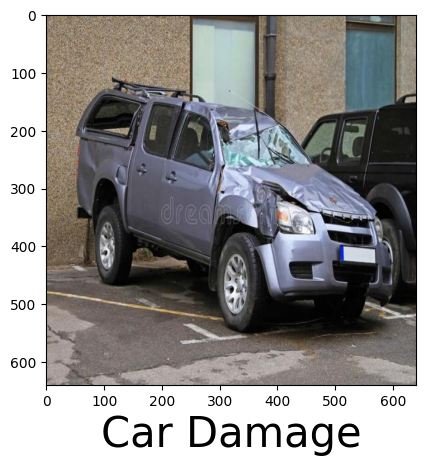

In [85]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

model1 = load_model('severity_model.h5')
def categorize_severity(severity_score):
    if severity_score >= 0.8:
        return 'High'
    elif severity_score >= 0.5:
        return 'Medium'
    else:
        return 'Low'

def predictImage(filename, model):
    
    img = image.load_img(filename)
    plt.imshow(img)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    # img_array /= 255.0
    val = model1.predict(img_array)[0][0]

    severity_level = categorize_severity(val)

    print(f"Severity Score: {val}")
    print(f"Severity Level: {severity_level}")

    if val < 0.5:
        print("Car is Damaged")
        plt.xlabel("Car Damage", fontsize=30)
    elif val >= 0.5:
        print("Car is Not Damaged")
        plt.xlabel("Car Not Damaged", fontsize=30)

# Assuming 'model' is the loaded model
u = 'car_data/test/major_roof--43-_jpg.rf.1e47267fb2eef9b3c372ee5d1f57b145.jpg';
predictImage(u, model1)
plt.show()

In [1]:
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import Adam

# Define image dimensions
img_width, img_height = 224, 224

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the pre-trained layers so they are not trainable
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 14747585 (56.26 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 14714688 (56.13 MB)
__________

In [18]:
from keras.callbacks import EarlyStopping

# Set up EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

batch_size = 32  # Adjust based on your dataset and memory constraints

# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=nb_train_samples // batch_size,  # Adjust based on your dataset size and batch size
    epochs=5,
    validation_data=valid_dataset,
    validation_steps=nb_validation_samples // batch_size,  # Adjust based on your dataset size and batch size
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
result = model.evaluate(test_dataset)
print("Test Loss:", result[0])
print("Test MAE:", result[1])

# Save the trained model
model.save('severity_model_vgg16.h5')

Epoch 1/5
62/62 [==============================] - 3037s 49s/step - loss: 0.1190 - mae: 0.2092 - val_loss: 6.7399e-04 - val_mae: 0.0197
Epoch 2/5
62/62 [==============================] - 3265s 53s/step - loss: 0.0010 - mae: 0.0186 - val_loss: 2.6376e-04 - val_mae: 0.0113
Epoch 3/5
62/62 [==============================] - 30376s 497s/step - loss: 3.2536e-04 - mae: 0.0095 - val_loss: 1.9025e-04 - val_mae: 0.0089
Epoch 4/5
62/62 [==============================] - 3288s 53s/step - loss: 2.1085e-04 - mae: 0.0060 - val_loss: 1.2347e-04 - val_mae: 0.0063
Epoch 5/5
5/5 [==============================] - 62s 12s/step - loss: 8.6837e-05 - mae: 0.0055
Test Loss: 8.68373826961033e-05
Test MAE: 0.005546718370169401


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


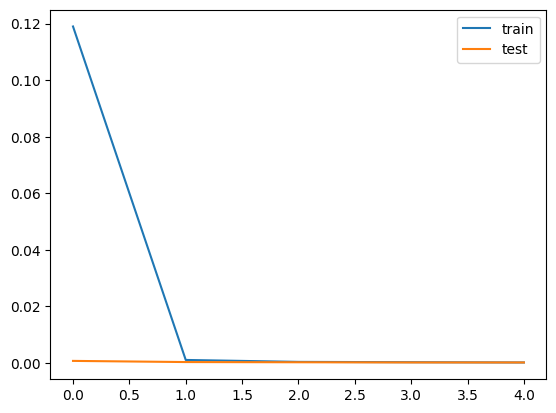

In [19]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Predict the VGGG16 Model

In [20]:
test_dataset.reset()
pred=model.predict_generator(test_dataset,
steps=64,
verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)

/var/folders/2f/_yt57dw5583djbw4thgygftc0000gn/T/ipykernel_99173/2226290701.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(test_dataset,


 5/64 [=>............................] - ETA: 11:17WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 64 batches). You may need to use the repeat() function when building your dataset.


64/64 [==============================] - 58s 730ms/step


In [21]:
predicted_class_indices

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
labels = (train_dataset.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [23]:
import pandas as pd
filenames=test_dataset.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

# Validate the VGG16 Model Output

1/1 [==============================] - 1s 682ms/step
Raw Predictions: [[2.538465]]
Severity Label: High


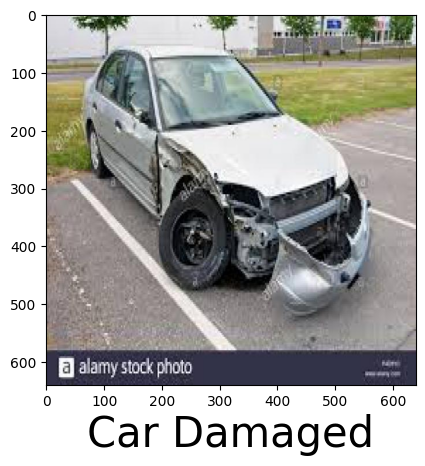

In [29]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

def predictImage(filename):
    # Load the image
    img = image.load_img(filename)
    plt.imshow(img)
    
    # Convert the image to an array and preprocess it
    Y = image.img_to_array(img)
    X = np.expand_dims(Y, axis=0)
    
    # Make predictions
    val = model.predict(X)
    
    print("Raw Predictions:", val)
    
    # Categorize the prediction and display the result
    if val < 0.5:
        plt.xlabel("Car Not Damage", fontsize=30)
        severity_label = "Low"
    elif val >= 0.5:
        plt.xlabel("Car Damaged", fontsize=30)
        severity_label = "High"
    
    print("Severity Label:", severity_label)
    
    # Show the image with the predicted label
    plt.show()

# Example usage
u = 'car_data/valid/oct-6---80-_jpg.rf.589f871da0d1a7c12a8a24aeb0d56584.jpg'
predictImage(u)